## Importing basic libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the datasets

In [13]:
datasets = {}
datasets['data'] = pd.read_csv('Data.csv')
datasets['position salaries'] = pd.read_csv('Position_Salaries.csv')

In [14]:
dataset = datasets['data']
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear regression

## Training the Linear Regression model on the Training set

In [16]:
from sklearn.linear_model import LinearRegression
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [17]:
y_pred_l = l_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_l.reshape(len(y_pred_l),1), y_test.reshape(len(y_test),1)),1))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


## Evaluating the Model Performance & recording it

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model_performances = pd.DataFrame(columns = ['Model', 'R2', 'MSE', 'MAE'])
model_performances.loc[0] = ['LR', r2_score(y_test, y_pred_l), 
                            mean_squared_error(y_test, y_pred_l),
                            mean_absolute_error(y_test, y_pred_l)]

# Polynomial/Multi - Linear Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
polynomial_regressor = LinearRegression()

In [20]:
polynomial_regressor.fit(X_poly, y)

LinearRegression()

In [21]:
y_pred_poly = polynomial_regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y_test.reshape(len(y_test),1)),1))

[[432.81 431.23]
 [457.35 460.01]
 [461.92 461.14]
 ...
 [468.8  473.26]
 [441.24 438.  ]
 [461.14 463.28]]


In [22]:
model_performances.loc[1] = ['LR-Poly', r2_score(y_test, y_pred_poly), 
                            mean_squared_error(y_test, y_pred_poly),
                            mean_absolute_error(y_test, y_pred_poly)]

# Decision Tree Regression

## Training the Decision Tree Regression model on the Training set

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [29]:
y_pred_dt = dt_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


## Evaluating the Model Performance

In [30]:
model_performances.loc[2] = ['DT', r2_score(y_test, y_pred_dt), 
                            mean_squared_error(y_test, y_pred_dt),
                            mean_absolute_error(y_test, y_pred_dt)]

# Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
y_pred_rf = random_forest_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


In [34]:
model_performances.loc[3] = ['RF', r2_score(y_test, y_pred_rf), 
                            mean_squared_error(y_test, y_pred_rf),
                            mean_absolute_error(y_test, y_pred_rf)]

# Support Vector Regression(SVR)

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(len(y_train),1))

## Training the SVR model on the Training set

In [36]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_train_scaled, y_train_scaled)

C:\Users\akshu\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [37]:
y_pred_svr_rbf = sc_y.inverse_transform(svm_regressor.predict(sc_X.transform(X_test)).reshape(-1, 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr_rbf.reshape(len(y_pred_svr_rbf),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


## Evaluating the Model Performance & recording it

In [38]:
model_performances.loc[4] = ['SVR - RBF', r2_score(y_test, y_pred_svr_rbf), 
                            mean_squared_error(y_test, y_pred_svr_rbf),
                            mean_absolute_error(y_test, y_pred_svr_rbf)]

# Support Vector Regression(SVR) - Linear

## Training the SVR model on the Training set

In [39]:
svm_linear_regressor = SVR(kernel = 'linear')
svm_linear_regressor.fit(X_train_scaled, y_train_scaled)

C:\Users\akshu\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

## Predicting the Test set results

In [40]:
y_pred_svr = sc_y.inverse_transform(svm_linear_regressor.predict(sc_X.transform(X_test)).reshape(-1, 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[431.04 431.23]
 [458.38 460.01]
 [462.73 461.14]
 ...
 [469.55 473.26]
 [441.98 438.  ]
 [461.88 463.28]]


## Evaluating the Model Performance & recording it

In [41]:
model_performances.loc[5] = ['SVR', r2_score(y_test, y_pred_svr), 
                            mean_squared_error(y_test, y_pred_svr),
                            mean_absolute_error(y_test, y_pred_svr)]

# Model Evaluations

In [42]:
model_performances

,Model,R2,MSE,MAE
0,LR,0.932532,19.733699,3.566565
1,LR-Poly,0.942295,16.878129,3.283019
2,DT,0.922906,22.549094,3.103924
3,RF,0.961591,11.234214,2.452367
4,SVR - RBF,0.948078,15.186435,2.995178
5,SVR,0.932197,19.831605,3.556684


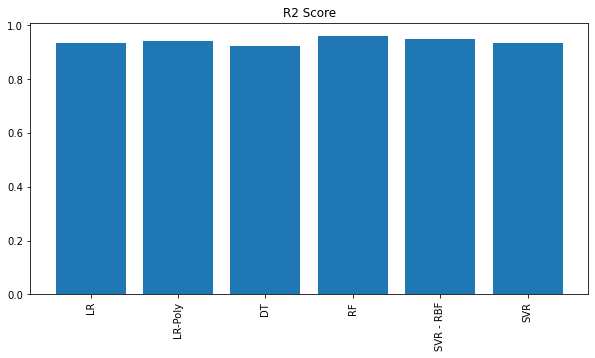

In [47]:
plt.figure(figsize = (10, 5))
plt.bar(model_performances['Model'], model_performances['R2'])
plt.title('R2 Score')
plt.xticks(rotation = 'vertical')
plt.show()

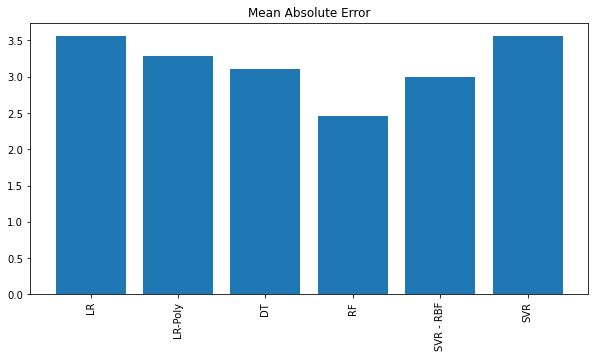

In [44]:
plt.figure(figsize = (10, 5))
plt.bar(model_performances['Model'], model_performances['MAE'])
plt.title('Mean Absolute Error')
plt.xticks(rotation = 'vertical')
plt.show()

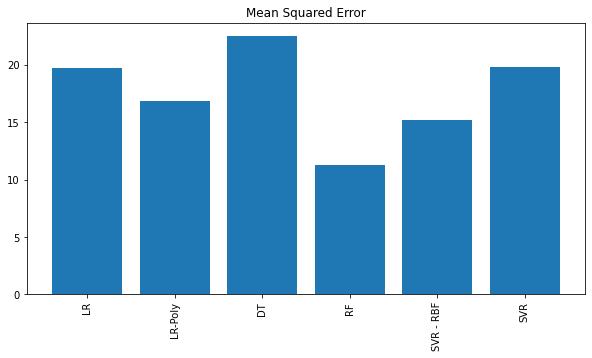

In [45]:
plt.figure(figsize = (10, 5))
plt.bar(model_performances['Model'], model_performances['MSE'])
plt.title('Mean Squared Error')
plt.xticks(rotation = 'vertical')
plt.show()

# Conclusion

It looks Random Forest Regressor is the best estimator having better R2 score and lowest Mean Squared & Absolute errors.